In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [9]:
df=pd.read_csv (r'C:\Users\aarumuga\Desktop\Brasil fire\brasil fire project 3.csv',encoding = "ISO-8859-1",parse_dates=['date'])

In [11]:
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [12]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [13]:
df.tail(1)

,year,state,month,number,date
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [14]:
df.shape

(6454, 5)

In [15]:
print("number of rows",df.shape[0])
print("number of colums",df.shape[1])

number of rows 6454
number of colums 5


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [17]:
df.info

<bound method DataFrame.info of       year      state     month  number       date
0     1998       Acre   Janeiro     0.0 1998-01-01
1     1999       Acre   Janeiro     0.0 1999-01-01
2     2000       Acre   Janeiro     0.0 2000-01-01
3     2001       Acre   Janeiro     0.0 2001-01-01
4     2002       Acre   Janeiro     0.0 2002-01-01
...    ...        ...       ...     ...        ...
6449  2012  Tocantins  Dezembro   128.0 2012-01-01
6450  2013  Tocantins  Dezembro    85.0 2013-01-01
6451  2014  Tocantins  Dezembro   223.0 2014-01-01
6452  2015  Tocantins  Dezembro   373.0 2015-01-01
6453  2016  Tocantins  Dezembro   119.0 2016-01-01

[6454 rows x 5 columns]>

In [18]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [11]:
df.duplicated().sum()

32

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [15]:
df['Month_new']=df['month'].map({'Janeiro':'jan','fevereiro':'feb','Marco':'march','Abril':'april','Maio':'may',
                                     'Junho':'jun','Julho':'july','Agosto':'Aug','Setembro':'seb','Outubro':'outober',
                                     'Novembro':'november','Dezembro':'Dec'})

In [16]:
df.head(5)

,year,state,month,number,date,Month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [17]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'Month_new'], dtype='object')

In [18]:
df1=df.groupby('Month_new')['number'].sum().reset_index()

df1

In [19]:
df1

,Month_new,number
0,Aug,88050.435
1,Dec,57535.480
2,april,28184.770
3,jan,47681.844
4,july,92319.113
5,jun,55997.675
6,may,34725.363
7,november,85508.054
8,outober,88681.579
9,seb,58578.305


<AxesSubplot:xlabel='Month_new', ylabel='number'>

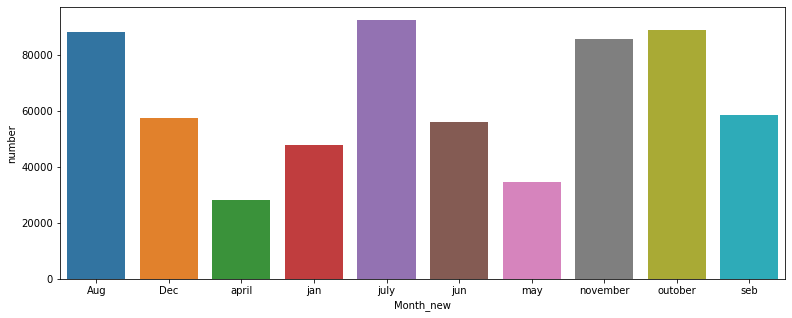

In [20]:
plt.figure(figsize=(13,5))
sns.barplot(x="Month_new",y="number",data=df1)


In [21]:
df.head()

,year,state,month,number,date,Month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [22]:
df2=df.groupby('year')['number'].sum().reset_index()

In [23]:
df2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<AxesSubplot:xlabel='year', ylabel='number'>

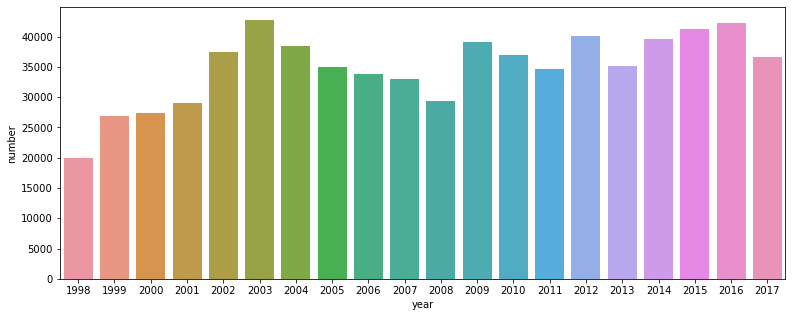

In [24]:
plt.figure(figsize=(13,5))
sns.barplot(x="year",y="number",data=df2)


In [25]:
df3=df.groupby('state')['number'].sum().reset_index()

In [26]:
df3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


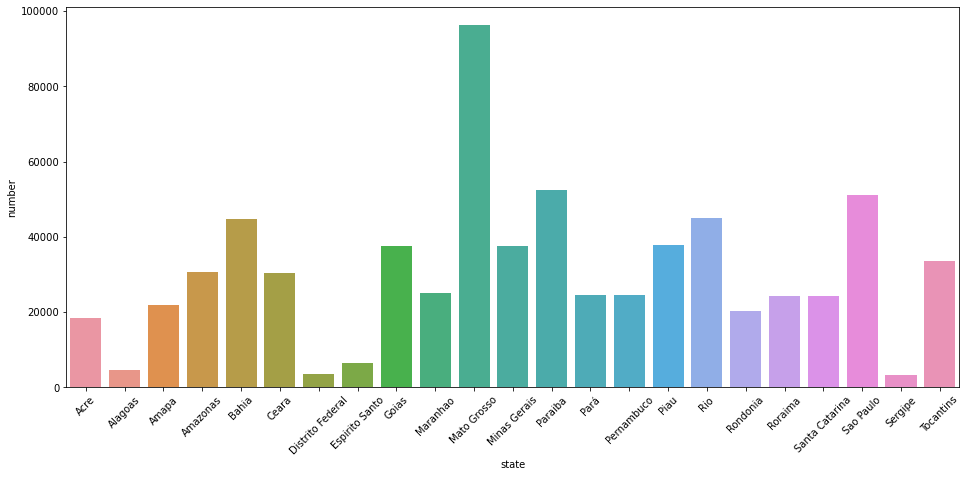

In [27]:
plt.figure(figsize=(16,7))
sns.barplot(x="state",y="number",data=df3)
plt.xticks(rotation=45)
plt.show()

In [28]:
df[df['state']==('Amazonas')]['number']

718      0.0
719      3.0
720      7.0
721      3.0
722     17.0
       ...  
952     80.0
953    236.0
954    293.0
955    565.0
956    133.0
Name: number, Length: 239, dtype: float64

In [29]:
df[df['state']==('Amazonas')]['number'].sum()

30650.129

In [30]:
df3=df[df['state']==('Amazonas')]
df3

,year,state,month,number,date,Month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,Dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,Dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,Dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,Dec


In [31]:
df4=df3.groupby('year')['number'].sum().reset_index()
df4

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<AxesSubplot:xlabel='year', ylabel='number'>

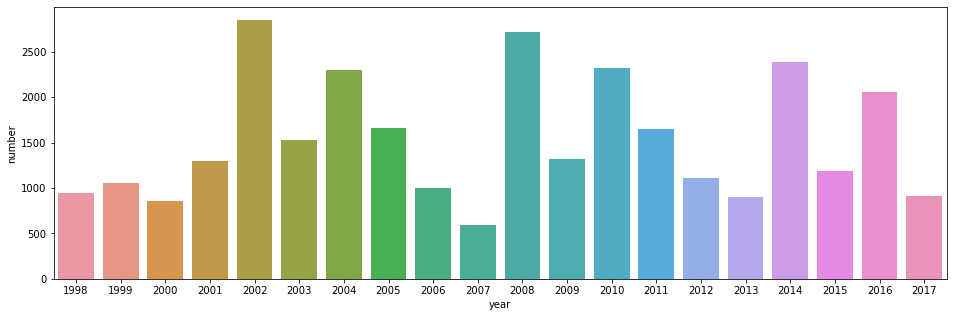

In [32]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=df4)

In [37]:
data6 = df[df['state']==('Amazonas')]
data6

,year,state,month,number,date,Month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,Dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,Dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,Dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,Dec


In [49]:
df6=df[df['year']==2015].groupby('Month_new')['number'].sum().reset_index()
df6

,Month_new,number
0,Aug,4363.125
1,Dec,4088.522
2,april,2573.000
3,jan,4635.000
4,july,4364.392
5,jun,3260.552
6,may,2384.000
7,november,4034.518
8,outober,4499.525
9,seb,2494.658


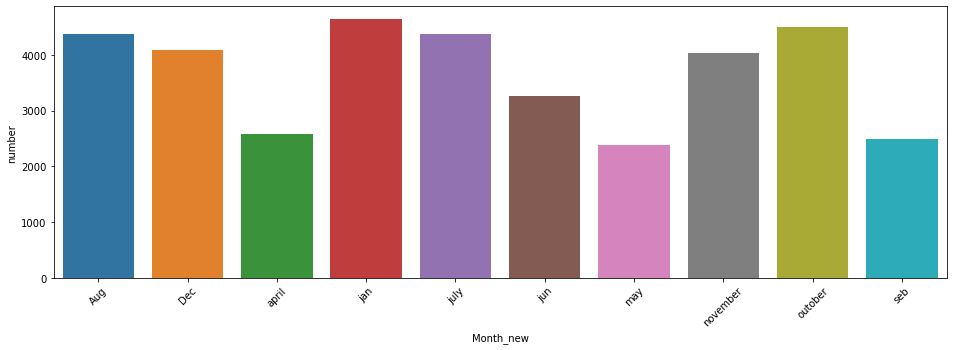

In [53]:
plt.figure(figsize=(16,5))
sns.barplot(x='Month_new',y='number',data=df6)
plt.xticks(rotation=45)
plt.show()

In [57]:
df7=df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
df7

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


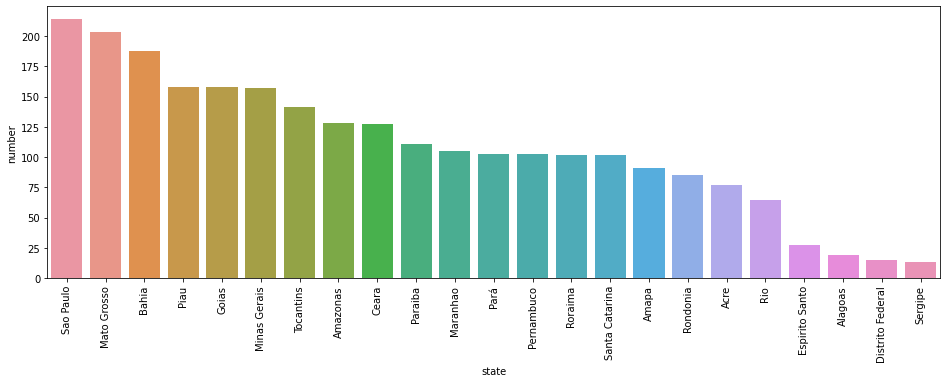

In [61]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=df7)
plt.xticks(rotation=90)
plt.show()

cell >> cell type >> markdown

18.  To Find The State Names Where Fires Were Reported In 'dec' Month


In [69]:
df[df['Month_new']=='Dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)